In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/cs7643
import sys
sys.path.append('/content/drive/MyDrive/cs7643')
!pip install mlflow skorch
# !pip install Ipython --upgrade
%cd /content/drive/MyDrive/cs7643

Mounted at /content/drive
data		       mlruns  pipeline_template.py  __pycache__  run2.ipynb
experiment_configs.py  models  plots		     run1.ipynb
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.1/575.1 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.6 MB/s eta 0:00:00
/content/drive/MyDrive/cs7643


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%ls

data/                  mlruns/  pipeline_template.py  __pycache__/  run2.ipynb
experiment_configs.py  models/  plots/                run1.ipynb


In [6]:
import pipeline_template
import mlflow
from experiment_configs import configs
mlflow.set_tracking_uri('file:/content/drive/MyDrive/cs7643/mlruns')

In [7]:
config = configs['cifar10_resnet20_self_att_baseline_training_logging']()
print(config.model_config.model)

ResnetSelfAtt(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (layer1): Sequential(
    (0): OriginalBasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU()
    )
    (1): OriginalBasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), 

In [8]:
def get_hyperparams(config=configs['cifar10_resnet20_self_att_baseline_training_logging']):
  model_config = vars(config.model_config)

  for key, value in model_config.items():
    if key != 'model':
        print(f"{key}: {value}")

get_hyperparams(config)

lr: 0.005
optimizer: <class 'torch.optim.adam.Adam'>
batch_size: 128
max_epochs: 182
weight_decay: 0.0001
momentum: 0.9
train_split: None
scheduler: <skorch.callbacks.lr_scheduler.LRScheduler object at 0x7c2b0aacd6c0>
log_model: True
add_test_set_eval: True


NoneType: None


Files already downloaded and verified
Files already downloaded and verified
Learning rate 0.005
Model is training under cuda
  epoch    test_err    train_err    train_loss      lr      dur
-------  ----------  -----------  ------------  ------  -------
      1     49.3600      48.5020        1.5969  0.0050  33.2781
      2     35.0700      34.6560        1.0848  0.0050  32.2292
      3     30.9100      30.2580        0.8733  0.0050  32.9941
      4     28.7800      27.6220        0.7506  0.0050  32.3209
      5     25.7100      25.1900        0.6796  0.0050  31.8582
      6     23.4200      22.7560        0.6237  0.0050  32.5868
      7     24.4900      22.8880        0.5919  0.0050  31.6139
      8     27.3800      25.8620        0.5603  0.0050  31.4393
      9     22.3100      20.9480        0.5460  0.0050  32.5067
     10     22.7400      22.2380        0.5293  0.0050  31.5050
     11     21.6300      20.0500        0.5133  0.0050  31.6098
     12     19.0400      16.6000        0.5

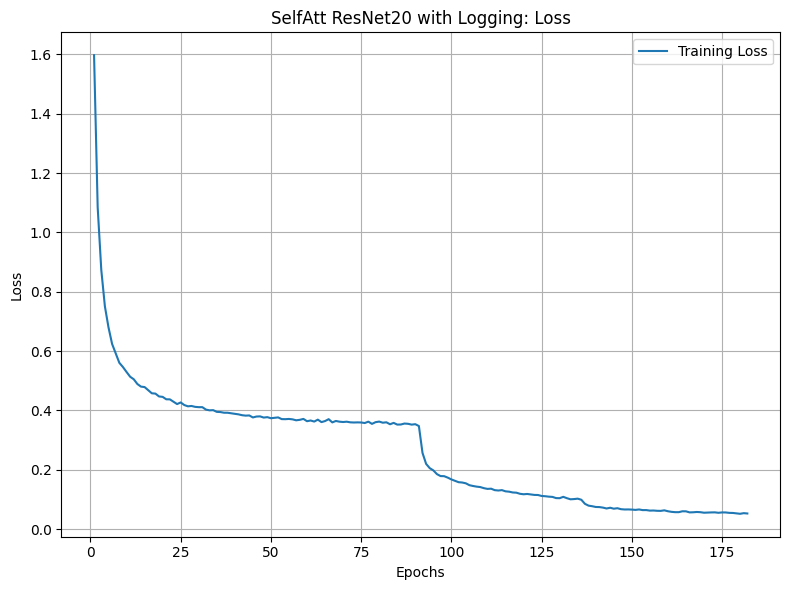

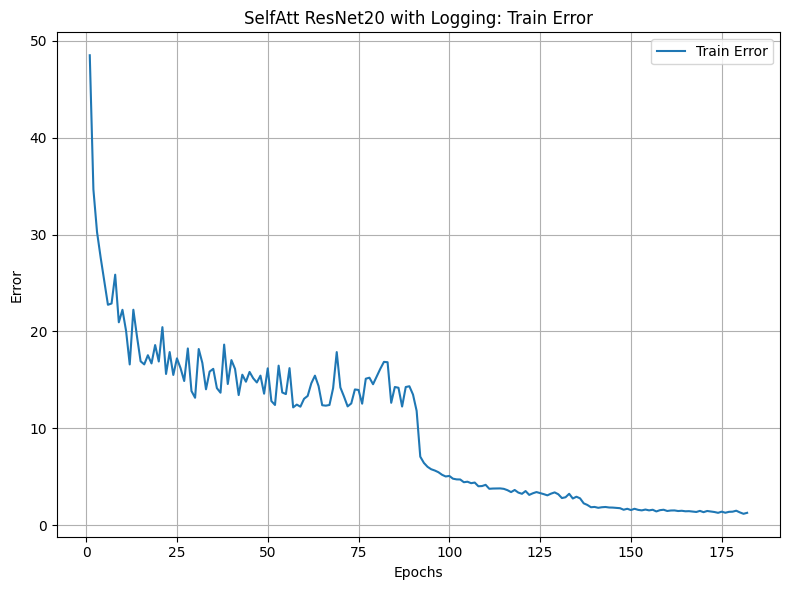

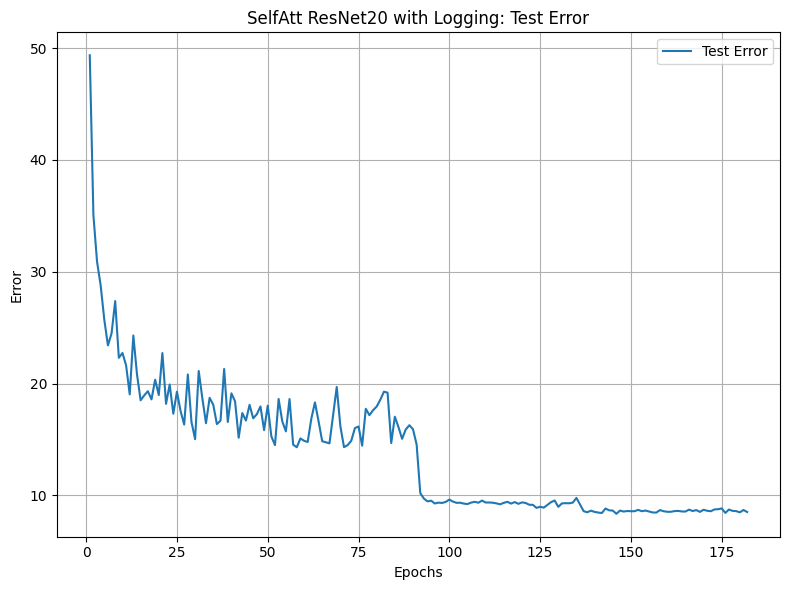

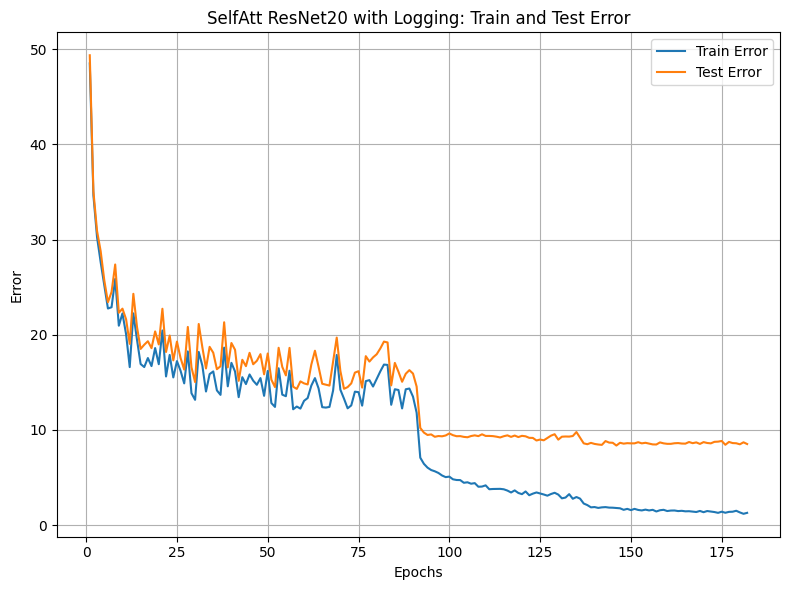

TypeError: Argument 'pytorch_model' should be a torch.nn.Module

In [9]:
pipeline_template.main('cifar10_resnet20_self_att_baseline_training_logging')
# pipeline_template.main('debug_config')